In [18]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics
import credit_data
import visualkeras

import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np



import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
train_data, test_data, train_label, test_label = credit_data.load_data(test_size = 0.3)

print(type(train_data), type(test_data), type(train_label), type(test_label)) 

train_data = train_data.todense()
test_data = test_data.todense()

train_label = utils.to_categorical(train_label)
test_label = utils.to_categorical(test_label)

print(train_data.shape, test_data.shape, train_label.shape, test_label.shape)

<class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(15906, 67) (6818, 67) (15906, 3) (6818, 3)


#### One-hot encoding

In [3]:
train_label 

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

#### Build the model & Set the criterion

In [4]:
model = models.Sequential() # Build up the "Sequence" of layers (Linear stack of layers)

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [5]:
type(train_data) 

numpy.matrix

In [6]:
model = models.Sequential() 

model.add(layers.Dense(input_dim=67, units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
# model.add(layers.BatchNormalization()) # Use this line as if needed
model.add(layers.Activation('elu')) # elu or relu (or layers.ELU / layers.LeakyReLU)

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 
model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(units=3, activation='softmax')) # One-hot vector for 0 & 1

In [7]:
# "Compile" the model description (Configures the model for training)
model.compile(optimizer='adam', 
              loss=losses.categorical_crossentropy, # See other available losses @ https://keras.io/losses/
              metrics=['accuracy']) # TF 2.X 에서 Precision / Recall / F1-Score 적용하기 @ https://j.mp/3cf3lbi

#### Train the model

In [8]:
# Fit the model on training data
history = model.fit(train_data, train_label, batch_size=100, epochs=10, validation_split = 0.3) # default batch_size = 32

Epoch 1/10
112/112 [==============================] - 3s 26ms/step - loss: 1.1400 - accuracy: 0.5777 - val_loss: 0.9029 - val_accuracy: 0.6477
Epoch 2/10
112/112 [==============================] - 3s 30ms/step - loss: 0.9276 - accuracy: 0.6357 - val_loss: 0.8912 - val_accuracy: 0.6555
Epoch 3/10
112/112 [==============================] - 3s 27ms/step - loss: 0.8720 - accuracy: 0.6608 - val_loss: 0.8694 - val_accuracy: 0.6641
Epoch 4/10
112/112 [==============================] - 3s 26ms/step - loss: 0.8531 - accuracy: 0.6724 - val_loss: 0.8594 - val_accuracy: 0.6676
Epoch 5/10
112/112 [==============================] - 3s 24ms/step - loss: 0.8437 - accuracy: 0.6772 - val_loss: 0.8585 - val_accuracy: 0.6655
Epoch 6/10
112/112 [==============================] - 3s 23ms/step - loss: 0.8285 - accuracy: 0.6823 - val_loss: 0.8557 - val_accuracy: 0.6639
Epoch 7/10
112/112 [==============================] - 3s 23ms/step - loss: 0.8231 - accuracy: 0.6819 - val_loss: 0.8450 - val_accuracy: 0.6737

#### Test test model


In [9]:
# Evaluate the model on test data

result = model.evaluate(test_data, test_label, batch_size=100)

69/69 [==============================] - 1s 11ms/step - loss: 0.8202 - accuracy: 0.6851


In [10]:
# batch_size=100, epochs=10, validation_split = 0.3
print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

loss (cross-entropy) : 0.8201902508735657
test accuracy : 0.6850982904434204


In [11]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

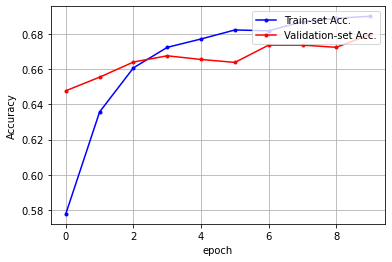

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

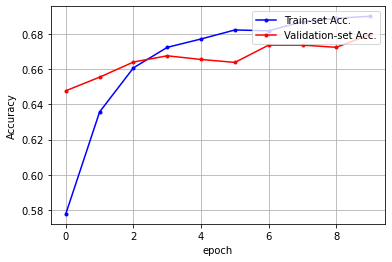

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

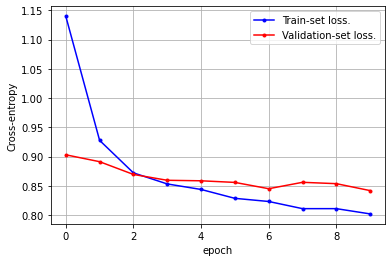

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x_len = np.arange(len(acc))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Cross-entropy')
plt.show()

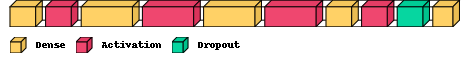

In [17]:
visualkeras.layered_view(model, legend = True)